# 回合更新价值迭代

* **无模型的机器学习算法**在没有环境的数学描述的情况下，**只依靠经验**学习出给定策略的价值函数和最优策略
* **根据更新时机**：<u>回合更新算法</u>（只用于回合制任务）和<u>时序差分更新算法</u>
  * 回合更新算法：同策略更新算法和异策略更新算法

## 同策回合更新

### 同策回合更新策略评估

【**思路**】用Monte Carlo方法估计状态价值和动作价值

* 具体而言，若某个状态（或状态动作对）出现了$c$次，其对应的回报值分别为$g_1,g_2,\dots,g_c$，那么可以估计其状态价值（或动作价值）为$\frac{1}{c}\sum_{i=1}^c g_i$

【**无模型策略评估算法**】：<u>评估状态价值函数</u>和<u>评估动作价值函数</u>

> 任意策略的价值函数满足Bellman期望方程
>
> * 借助于动力$p$，可以用状态价值函数表示动作价值函数
> * 借助于策略$\pi$，可以用动作价值函数表示状态价值函数

对于无模型策略评估，由于动力$p$的表达式未知，只能用动作价值表示状态价值。——*动作价值函数更重要*

> 同一状态可能被多次访问

【**每次访问回合更新**】采用回合内全部的回报样本值更新价值函数

【**首次访问回合更新**】每个回合只采用第一次访问的回报样本更新价值函数

#### 每次访问回合更新

1. **更新评估策略的动作价值**：

   【输入】环境（无数学描述），策略$\pi$

   【输出】动作价值函数$q(s,a),s \in S, a \in A$

   1. 初始化：$q(s,a) \leftarrow$ 任意值，若需计数器则$c(s,a) \leftarrow 0$
   2. 回合更新：对于每个回合执行以下操作：
      1. 采样：用策略$\pi$生成轨迹$S_0,A_0,R_1,S_1,\dots,S_{T-1},A_{T-1},R_T,S_T$
      2. 初始化回报：$G \leftarrow 0$
      3. 逐步更新：对$t \leftarrow T-1,T-2,\dots, 0$，执行以下步骤：
         1. 更新回报：$G \leftarrow \gamma G + R_{t+1}$
         2. 更新动作价值：更新$q(S_t,A_t)$以减小$[G-q(S_t,A_t)]^2$（如$c(S_t,A_t) \leftarrow c(S_t,A_t)+1$，$q(S_t,A_t) \leftarrow q(S_t,A_t) + \frac{1}{c(S_t,A_t)}[G-q(S_t,A_t)]$）

2. **更新评估策略的状态价值**：

   【输入】环境（无数学描述），策略$\pi$

   【输出】动作价值函数$v(s),s \in S$

   1. 初始化：$v(s) \leftarrow$ 任意值，若需计数器则$c(s) \leftarrow 0$
   2. 回合更新：对于每个回合执行以下操作：
      1. 采样：用策略$\pi$生成轨迹$S_0,A_0,R_1,S_1,\dots,S_{T-1},A_{T-1},R_T,S_T$
      2. 初始化回报：$G \leftarrow 0$
      3. 逐步更新：对$t \leftarrow T-1,T-2,\dots, 0$，执行以下步骤：
         1. 更新回报：$G \leftarrow \gamma G + R_{t+1}$
         2. 更新动作价值：更新$q(S_t,A_t)$以减小$[G-v(S_t)]^2$（如$c(S_t) \leftarrow c(S_t)+1$，$v(S_t) \leftarrow v(S_t) + \frac{1}{c(S_t)}[G-v(S_t)]$）

#### 首次访问回合更新评估

1. **更新评估策略的动作价值**：

   【输入】环境（无数学描述），策略$\pi$

   【输出】动作价值函数$q(s,a),s \in S, a \in A$

   1. 初始化：$q(s,a) \leftarrow$ 任意值，若需计数器则$c(s,a) \leftarrow 0$
   2. 回合更新：对于每个回合执行以下操作：
      1. 采样：用策略$\pi$生成轨迹$S_0,A_0,R_1,S_1,\dots,S_{T-1},A_{T-1},R_T,S_T$
      2. 初始化回报：$G \leftarrow 0$
      3. 初始化首次出现的步骤数$f(s,a) \leftarrow -1$
      4. 统计首次出现的步骤数：对于$t \leftarrow 0,1,\dots,T-1$，执行以下步骤：若$f(S_t,A_t) <0$，则$f(S_t,A_t) \leftarrow t$
      5. 逐步更新：对$t \leftarrow T-1,T-2,\dots,0$，执行以下步骤：
         1. 更新回报：$G \leftarrow \gamma G + R_{t+1}$
         2. 首次出现时则更新：若$f(S_t,A_t)=t$，则更新$q(S_t,A_t)$以减小$[G-q(S_t,A_t)]^2$（如$c(S_t,A_t) \leftarrow c(S_t,A_t)+1$，$q(S_t,A_t) \leftarrow q(S_t,A_t) + \frac{1}{c(S_t,A_t)}[G-q(S_t,A_t)]$）

2. **更新评估策略的状态价值**：

   【输入】环境（无数学描述），策略$\pi$

   【输出】动作价值函数$v(s),s \in S$

   1. 初始化：$v(s) \leftarrow$ 任意值，若需计数器则$c(s) \leftarrow 0$
   2. 回合更新：对于每个回合执行以下操作：
      1. 采样：用策略$\pi$生成轨迹$S_0,A_0,R_1,S_1,\dots,S_{T-1},A_{T-1},R_T,S_T$
      2. 初始化回报：$G \leftarrow 0$
      3. 初始化首次出现的步骤数$f(s) \leftarrow -1$
      4. 统计首次出现的步骤数：对于$t \leftarrow 0,1,\dots,T-1$，执行以下步骤：若$f(S_t) <0$，则$f(S_t) \leftarrow t$
      5. 逐步更新：对$t \leftarrow T-1,T-2,\dots, 0$，执行以下步骤：
         1. 更新回报：$G \leftarrow \gamma G + R_{t+1}$
         2. 首次出现时则更新：若$f(S_t)=t$，则更新$q(S_t,A_t)$以减小$[G-v(S_t)]^2$（如$c(S_t) \leftarrow c(S_t)+1$，$v(S_t) \leftarrow v(S_t) + \frac{1}{c(S_t)}[G-v(S_t)]$）

【**补充**】

1. 采用逆序法进行更新，此时可以利用$G_t = R_{t+1} + \gamma G_t$进行更新，可减小计算量

2. 在更新动作价值时，可以采用增量法来实现Monte Carlo方法。

   **增量法原理**：$\bar{g}_c = \bar{g}_{c-1} +\frac{1}{c}(g_c - \bar{g}_{c-1})$

   <u>从Robbins-Monro算法的角度理解</u>：如果要通过某个有界的随机变量$G$的许多观测$g_1,g_2,\dots$来估计它的均值$q = E[G]$，可以采用迭代式：$q_k \leftarrow q_{k-1} + \alpha_k (g_k - q_{k-1})$。其中$q_0$为任意指定的迭代初始值，$\alpha_k$为学习率。

   * 若学习率序列$\alpha_k$满足如下三个条件：

     1. $\alpha_k \ge 0, k = 1,2,3,\dots$
     2. 不受起点限制而可以达到任意收敛单的条件：$\sum \alpha_k = +\infty$
     3. 不受噪声限制而最终可以收敛的条件：$\sum \alpha_k^2 < +\infty$

     则有$q_k \to q, k \to +\infty$

   增量法即为取$\alpha_k = 1/k$，可保证算法收敛

   强化学习与其他学习算法的基础相似，其学习理论的核心在于Robbins-Monro算法的根基**随机近似**理论

3. 不是所有的减小$[G-q(S_t,A_t)]^2$的方法都可使用，需要满足Robbins-Monro算法的收敛条件

4. 可以利用求出的动作价值直接求状态价值

### 带起始探索的同策回合更新

【**基本思想**】在更新价值估计后，进行策略改进，就可以得到新的策略，不断更新就有希望找到最优策略

【**问题**】如果只是简单将回合更新策略评估算法移植为同策回合更新评估算法，时常会困于局部最优而无法找到全局最优。同策算法可能会从一个并不好的策略出发，只经过那些很差的状态，然后只为这些很差的状态更新价值。

【**起始探索**】让所有可能的状态动作对都可能成为回合起点，防止遗漏任何动作状态对

* 目前不清楚带起始探索的同策回合更新是否总能收敛到最优策略

#### 带起始探索的每次访问同策回合更新算法

1. 初始化：$q(s,a) \leftarrow any$，$c(s,a \leftarrow 0$，$\pi(s) \leftarrow any$
2. 回合更新：对每个回合执行以下动作：
   1. 起始探索：选择$S_0 \in S,A_0 \in A$，使得所有可能的状态动作对都可能成为回合起点，即被选为$(S_0,A_0)$
   2. 采样：用策略$\pi$生成轨迹$S_0,A_0,R_1,S_1,\dots,S_{T-1},A_{T-1},R_T,S_T$
   3. 初始化回报：$G \leftarrow 0$
   4. 逐步更新：对$t \leftarrow T-1,T-2,\dots, 0$，执行以下步骤：
      1. 更新回报：$G \leftarrow \gamma G + R_{t+1}$
      2. 更新动作价值：更新$q(S_t,A_t)$以减小$[G-v(S_t)]^2$（如$c(S_t) \leftarrow c(S_t)+1$，$v(S_t) \leftarrow v(S_t) + \frac{1}{c(S_t)}[G-v(S_t)]$）
      3. 策略改进：$\pi(S_t) \leftarrow \mathop{\arg\max}_a q(S_t,a)$（若有多个$a$满足条件则任选一个）

【**限制**】必须能够指定任意状态为回合的起始状态



### 基于柔性策略的同策回合更新

【**柔性策略**】对于某个策略$\pi$，如果它对任意的$s \in S， a \in A$均有$\pi(a|s) >0$，则称此策略为柔性策略。

* 柔性策略可选择所有可能的动作，所以从一个状态出发可以达到此状态能达到的所有状态和所有状态动作对。
* 若$S,A$均有限，则存在$\varepsilon > 0$使得$\pi(a|s) > \varepsilon / |A(s)|$。
* 对于任意策略$\pi$和正数$\varepsilon$，若对任意$s \in S, a \in A(s)$，均有$\pi(a|s) > \varepsilon / |A(s)|$，则称策略$\pi$是$\varepsilon$柔性策略


【**$\varepsilon$贪心策略**】对于给定环境上的某个确定性策略，在所有的$\varepsilon$柔性策略中有一个策略最接近这个确定性策略，称为$\varepsilon$贪心策略
$$
\pi(a|s) = \begin{cases}
  1, a = a^*\\
  0, a \ne a^*
  \end{cases}(确定性策略)
  \Rightarrow
  \pi(a|s) = \begin{cases}
  1 - \varepsilon + \frac{\varepsilon}{|A(s)|}, a = a^*\\
  \frac{\varepsilon}{|A(s)|}, a \ne a^*
  \end{cases}(\varepsilon贪心策略)
$$

* 把$\varepsilon$平均分配到各动作上，剩下的$1-\varepsilon$分给$a^*$。要点在于在策略提升环节用$\varepsilon$贪心策略的表达式来更新策略
* 用$\varepsilon$贪心策略的表达式更新策略仍然满足<u>策略改进定理</u>

#### 基于柔性策略的每次访问同策回合更新算法

1. 初始化：$q(s,a) \leftarrow any$，$c(s,a \leftarrow 0$，$\pi(·|·) \leftarrow$任意柔性策略
2. 回合更新：对每个回合执行以下动作：
   1. 采样：用策略$\pi$生成轨迹$S_0,A_0,R_1,S_1,\dots,S_{T-1},A_{T-1},R_T,S_T$
   2. 初始化回报：$G \leftarrow 0$
   3. 逐步更新：对$t \leftarrow T-1,T-2,\dots, 0$，执行以下步骤：
      1. 更新回报：$G \leftarrow \gamma G + R_{t+1}$
      2. 更新计数和动作价值：更新$q(S_t,A_t)$以减小$[G-v(S_t)]^2$（如$c(S_t) \leftarrow c(S_t)+1$，$v(S_t) \leftarrow v(S_t) + \frac{1}{c(S_t)}[G-v(S_t)]$）
      3. 策略改进：$A^* = \mathop{\arg\max}_a q(S_t,a)$，更新策略$\pi(·|S_t)$为确定性策略$\pi(a|S_t) = 0, a \ne A^*$对应的柔性策略（如$\pi(a|S_t) \leftarrow \frac{\varepsilon}{|A(s)|},\pi(A^*|S_t) \leftarrow \pi(A^*|S_t) + (1-\varepsilon)$）

【补充】

* 算法一开始除初始化计数值和动作价值函数外，还要将策略$\pi$初始化为$\varepsilon$柔性策略。只有一开始初始化为$\varepsilon$柔性策略，在后续更新后才是$\varepsilon$柔性策略

* 由于策略$\pi$理论上可以覆盖所有可达状态和动作对，因此可以求得全局最优策略

* 策略改进不一定要在每步更新价值函数后就立刻进行。当回合数较长，但是状态较少时，可以在价值函数完全更新完毕后统一进行。

* 可不显式维护策略，而是在决定动作时用动作价值函数隐含的$\varepsilon$柔性策略来决定动作。

  > 在状态$S_t$下通过动作价值$q(S_t,·)$来产生$\varepsilon$贪心策略决定动作$A_t$，可以先在$[0,1]$内均匀抽取随机数$X$，若$X < \varepsilon$则进行探索，从$A(s)$中等概率选取一个动作作为$A_t$，否则选择最优动作$\mathop{\arg\max}_aq(S_t,a)$为动作$A_t$。

## 案例：21点游戏（Blackjack-v0）
环境使用

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import gym

In [2]:
env = gym.make("Blackjack-v0")
print("观测空间 = {}".format(env.observation_space))
print("动作空间 = {}".format(env.action_space))
print("动作数量 = {}".format(env.action_space.n))

观测空间 = Tuple(Discrete(32), Discrete(11), Discrete(2))
动作空间 = Discrete(2)
动作数量 = 2


随机策略测试

In [3]:
def play_once(env,render=False):
    total_reward = 0
    observation = env.reset()
    print("初始观测 = {}".format(observation))
    while True:
        print("-------------------------------------")
        if render:
            env.render()
        print("玩家 = {}，庄家 = {}".format(env.player, env.dealer))
        action = np.random.choice(env.action_space.n)
        print("动作 = {}".format(action))
        observation,reward,done,_ = env.step(action)
        print("观测 = {}，奖励 = {}，结束指示 = {}".format(observation,reward,done))
        total_reward += reward
        if done:
            return total_reward

total = play_once(env)

初始观测 = (11, 4, False)
-------------------------------------
玩家 = [4, 7]，庄家 = [4, 10]
动作 = 0
观测 = (11, 4, False)，奖励 = 1.0，结束指示 = True


### 同策策略评估

In [4]:
def ob2state(observation):
    return observation[0], observation[1], int(observation[2])

def evaluate_action_monte_carlo(env, policy, episode_num = 5000):
    q = np.zeros_like(policy)
    c = np.zeros_like(policy)
    for _ in range(episode_num):
        state_actions = []
        observation = env.reset()
        #运行一次
        while True:
            state = ob2state(observation)
            action = np.random.choice(env.action_space.n, p = policy[state])
            state_actions.append((state,action))
            observation, reward, done, _ = env.step(action)
            if done:
                break

        g = reward
        for state, action in state_actions:
            c[state][action] += 1
            q[state][action] += (g - q[state][action]) / c[state][action]
    return q

策略：总点数大于等于20时不要牌，小于等于20时要牌

In [5]:
policy = np.zeros((22, 11, 2, 2))
policy[20:, :, :, 0] = 1 # >= 20 时收手
policy[:20, :, :, 1] = 1 # < 20 时继续
# print(policy)
q = evaluate_action_monte_carlo(env, policy) # 动作价值
v = (q * policy).sum(axis=-1) # 状态价值

In [6]:
def plot(data):
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    titles = ['without ace', 'with ace']
    have_aces = [0, 1]
    extent = [12, 22, 1, 11]
    for title, have_ace, axis in zip(titles, have_aces, axes):
        dat = data[extent[0]:extent[1], extent[2]:extent[3], have_ace].T
        axis.imshow(dat, extent=extent, origin='lower')
        axis.set_xlabel('player sum')
        axis.set_ylabel('dealer showing')
        axis.set_title(title)

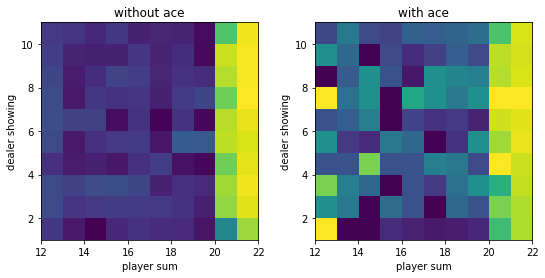

In [7]:
plot(v)

带起始探索的同策回合更新算法

In [21]:
def monte_carlo_with_exploring_start(env, episode_num=50000):
    policy = np.zeros((22,11,2,2))
    policy[:, :, :,1] = 1
    q = np.zeros_like(policy)
    c = np.zeros_like(policy)
    for _  in range(episode_num):
        state = (np.random.randint(12,22),
                 np.random.randint(1,11),
                 np.random.randint(2))
        action = np.random.randint(2)

        if state[2]:
            env.player = [1, state[0] - 11]
        else:
            if state[0] == 21:
                env.player = [10, 9, 2]
            else:
                env.player = [10, state[0] - 10]
        env.dealer[0] = state[1]

        state_actions = []
        env.reset()
        while True:
            state_actions.append((state,action))
            observation, reward, done, _ = env.step(action)
            if done:
                break
            state = ob2state(observation)
            action = np.random.choice(env.action_space.n, p = policy[state])
        
        g = reward # 回报
        for state, action in state_actions:
            c[state][action] += 1.
            q[state][action] += (g - q[state][action]) / c[state][action]
            a = q[state].argmax()
            policy[state] = 0.
            policy[state][a] = 1.
    return policy, q

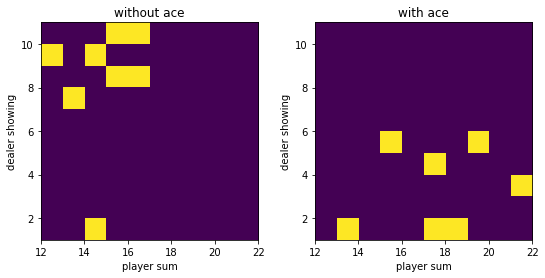

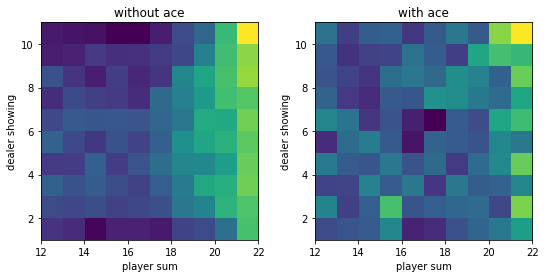

In [22]:
policy, q = monte_carlo_with_exploring_start(env)
v = q.max(axis=-1)
plot(policy.argmax(-1))
plot(v)

基于柔性策略的同策回合更新

In [41]:
def monte_carlo_with_soft(env, episode_num=5000, epsilon=0.1):
    policy = np.ones((22, 11, 2, 2)) * 0.5 # 柔性策略
    q = np.zeros_like(policy)
    c = np.zeros_like(policy)
    for _ in range(episode_num):
        state_actions = []
        observation = env.reset()
        while True:
            state = ob2state(observation)
            action = np.random.choice(env.action_space.n, p = policy[state])
            state_actions.append((state, action))
            observation, reward, done, _ = env.step(action)
            if done:
                break
        g = reward
        for state, action in state_actions:
            c[state][action] += 1.
            q[state][action] += (g - q[state][action]) / c[state][action]
            a = q[state].argmax()
            policy[state] = epsilon / env.action_space.n
            policy[state][a] += 1. - epsilon
    return policy, q

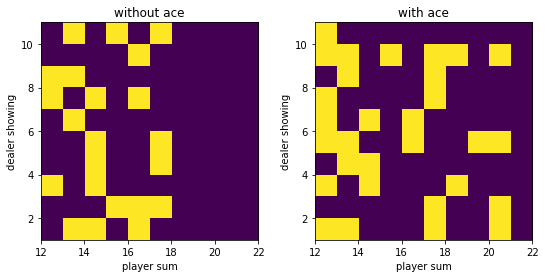

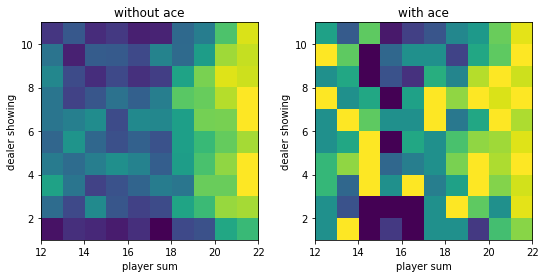

In [43]:
policy, q = monte_carlo_with_soft(env)
v = q.max(axis=-1)

plot(policy.argmax(-1))
plot(v)